In [199]:
import numpy as np
import numpy.random as npr
from autograd import jacobian
# from time_averaged_dist import TimeAveragedDist
import matplotlib.pyplot as plt
from scipy.special import logsumexp

In [208]:
#     x_max, _ = x.max(dim=1,keepdim=True)
#     x_max_expand = x_max.expand(x.size())
#     res =  x_max + torch.log((x-x_max_expand).exp().sum(dim=1, keepdim=True))
#     return res

class TimeAveragedDist(object):    
    def __init__(self, explr_idx=[0], log_std=-2., capacity=100):
        self.log_std   = log_std    
        self.capacity  = capacity    
        self.explr_idx = explr_idx     
        self._N = len(explr_idx)
    def log_prob(self, x, s, grad=False):    
        """ Calculates the log probability of the time averaged distribution      
            which is basically a log sum exp
        """ 
        if grad:
            assert len(x.shape) == 1, 'Gradients take one value for x'
            grad_logprob = np.zeros((s.shape[0], x.shape[0]))
            grad_logprob[:, self.explr_idx] =  -(x[self.explr_idx]-s)/np.exp(self.log_std)
            return grad_logprob
        
        # This is a inline log mean exp for numerical conditioning 
        logp = -self._N*0.5*self.log_std-0.5*np.sum(((x[:,self.explr_idx]-s)/np.exp(self.log_std))**2, 1)
        max_logp = np.max(logp)
        return max_logp + np.log(np.mean(np.exp(logp - max_logp)))

In [209]:
dist = TimeAveragedDist()

In [212]:
x = np.concatenate([
    npr.normal(-0.6, 0.1, size=(5,2)),
    npr.normal(0.6, 0.1, size=(5,2))] , axis=0)
s = np.linspace(-1., 1.).reshape(-1,1)

In [213]:
dist.log_prob(x[0], s[:5,:], grad=True)

array([[-3.88253283,  0.        ],
       [-3.5809387 ,  0.        ],
       [-3.27934458,  0.        ],
       [-2.97775045,  0.        ],
       [-2.67615632,  0.        ]])

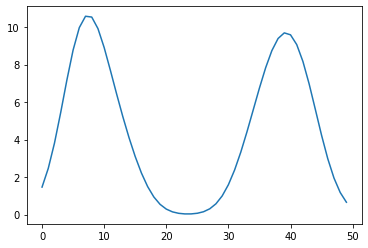

In [185]:
plt.plot([np.exp(dist.log_prob(x, si)) for si in s])

In [121]:
def log_prob(x, s):
    log_std = 0.
    return  - 0.5 * log_std - 0.5* np.sum(((x[[0]]-s)/np.exp(log_std))**2,1)
def prob(x, s):
    return np.exp(log_prob(x, s))
grad_logprob = jacobian(log_prob)
grad_prob = jacobian(prob)

In [122]:
def n_glogprob(x, s):
    log_std = 0.
    return -(x[[0]] - s)/np.exp(log_std)

In [128]:
n_glogprob(x[0], s)

array([[-0.40512733],
       [ 0.09487267],
       [ 0.59487267],
       [ 1.09487267],
       [ 1.59487267]])

In [134]:
grad_prob(x[0], s) / prob(x[0], s).reshape(-1,1)

array([[-0.40512733,  0.        ],
       [ 0.09487267,  0.        ],
       [ 0.59487267,  0.        ],
       [ 1.09487267,  0.        ],
       [ 1.59487267,  0.        ]])

In [130]:
grad_logprob(x[0], s)

array([[-0.40512733,  0.        ],
       [ 0.09487267,  0.        ],
       [ 0.59487267,  0.        ],
       [ 1.09487267,  0.        ],
       [ 1.59487267,  0.        ]])

In [4]:
dist = TimeAveragedDist()

In [51]:
x = np.concatenate([
    npr.normal(-0.6, 0.01, size=(100,1)),
    npr.normal(0.6, 0.01, size=(100,1))] , axis=0)

In [72]:
def log_pdf(x, s):
    log_std = -2.
    return  -0.5*log_std-0.5 * np.sum(((x[:,[0]] - s[0])/np.exp(log_std))**2, 1, keepdims=True)


In [67]:
def logsumexp(x):
    x_max, _ = x.max(dim=1,keepdim=True)
    x_max_expand = x_max.expand(x.size())
    res =  x_max + torch.log((x-x_max_expand).exp().sum(dim=1, keepdim=True))
    return res

In [77]:
lpdf = log_pdf(x, s[0])
max_lpdf = np.max(lpdf)

In [80]:
np.mean(np.exp(lpdf - max_lpdf)) + max_lpdf

-2.5461631762008734

In [70]:
cc = [logsumexp(log_pdf(x, si)) for si in s]


TypeError: _amax() got an unexpected keyword argument 'dim'

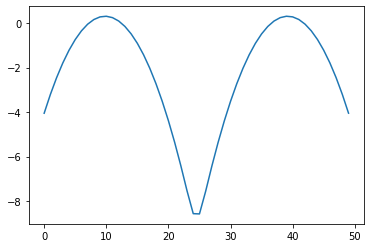

In [66]:
plt.plot(cc)